# Introduction:
Our group project aims to determine which "kinds" of players are most likely to contribute a large amount of data by analyzing play time with personal history with Minecraft so that the research group can target those players in their recruiting efforts.


# The Data Sets:

 `players.csv` dataset contains 196 observations and 9 variables. <br><br>
         Variables: <br>
        <blockquote>`Experience`: What their previous experience with Minecraft is <br> 
        `Subscribe`: If they are subscribed to email updates or not <br>
        `HashedEmail`: encrypted format of their email <br>
        `Name`: Name on plaicraft.ai <br>
        `Gender`: recorded gender <br>
        `Age`: recorded age <br>
        `individualID`: individual id if available <br>
        `organizationName`: Name of associated organization if available <br>
        `played_hours`: total hours contributed on plaicraft.ai<br></blockquote>

    
`game_time.csv` has 1535 rows and 5 variables: <br><br>
    Variables: <br>
    <blockquote>`hashedEmail`: encrypted format of their email<br>
    `start_time`: start time of session<br>
    `end_time`:end time of session<br>
    `original_start_time`: start time of session in reference to POSIX<br>
    `original_end_time`: end time of session in reference to POSIX</blockquote>

In [46]:
#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library(ggplot2)
#set seed
set.seed(2024)

In [47]:
url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
play_data <- read_csv(url1)
session_data <- read_csv(url2)
print(play_data)
print(session_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 196 × 9
   experience subscribe hashedEmail played_hours name  gender   age individualId
   <chr>      <lgl>     <chr>              <dbl> <chr> <chr>  <dbl> <lgl>       
 1 Pro        TRUE      f6daba428a…         30.3 Morg… Male       9 NA          
 2 Veteran    TRUE      f3c813577c…          3.8 Chri… Male      17 NA          
 3 Veteran    FALSE     b674dd7ee0…          0   Blake Male      17 NA          
 4 Amateur    TRUE      23fe711e0e…          0.7 Flora Female    21 NA          
 5 Regular    TRUE      7dc01f10bf…          0.1 Kylie Male      21 NA          
 6 Amateur    TRUE      f58aad5996…          0   Adri… Female    17 NA          
 7 Regular    TRUE      8e594b8953…          0   Luna  Female    19 NA          
 8 Amateur    FALSE     1d2371d8a3…          0   Emer… Male      21 NA          
 9 Amateur    TRUE      8b71f4d66a…          0.1 Nata… Male      17 NA          
10 Veteran    TRUE      bbe2d83de6…          0   Nyla  Female    22 NA          
# ℹ 186 

In [48]:
play_data_select <- play_data|>
                     select(-individualId, -organizationName)

session_data_select <- session_data |>
                        mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
                        end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
                        select(-original_start_time, -original_end_time)

combined_data <- left_join(play_data_select, session_data_select, by = "hashedEmail")

head(play_data_select)
head(session_data_select)
head(combined_data)

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time
<chr>,<dttm>,<dttm>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00


experience,subscribe,hashedEmail,played_hours,name,gender,age,start_time,end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dttm>,<dttm>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08 00:21:00,2024-08-08 01:35:00
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-09 22:30:00,2024-09-09 22:37:00
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08 02:41:00,2024-08-08 03:25:00
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-10 15:07:00,2024-09-10 15:29:00
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-05-05 22:21:00,2024-05-05 23:17:00
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-04-06 22:24:00,2024-04-06 23:33:00


In [49]:
play_data_number<-play_data_select|>
#Mutating for experience and gender:
                  mutate(experience_num = case_when(experience == "Veteran" ~ 5,
                                                    experience == "Pro" ~ 4, 
                                                    experience == "Regular" ~ 3, 
                                                    experience =="Amateur" ~ 2,
                                                    experience == "Beginner" ~ 1,))|>
                  mutate(gender_num = case_when(gender == "Male" ~ 0,
                                                gender =="Female" ~ 1,
                                                gender =="Agender" ~ 2,
                                                gender =="Non-binary" ~2,
                                                gender =="Two-Spirted" ~2,
                                                gender =="Other" ~2,
                                                gender =="Prefer Not to Say" ~2))|>
#removing NAs from the dataset
                  na.omit(play_data_select)

head(play_data_number)

experience,subscribe,hashedEmail,played_hours,name,gender,age,experience_num,gender_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,4,0
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,5,0
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5,0
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,2,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,3,0
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,2,1


In [50]:
#splitting the data set into training and testing
minecraft_split<-initial_split(play_data_number, prop=0.75, strata = played_hours)
minecraft_train<-training(minecraft_split)
minecraft_test<-testing(minecraft_split)

In [51]:
mean_play<- minecraft_train|>
group_by(experience)|>
    summarize(average_hours=mean(played_hours))
mean_play

experience,average_hours
<chr>,<dbl>
Amateur,6.9190476
Beginner,0.7380952
Pro,3.4800000
Regular,19.8347826
Veteran,0.7189189


In [52]:
plot1 <- ggplot(minecraft_train, aes(x = experience, y = played_hours)) +
         geom_bar(stat = "identity") +
         labs(
              title = "Figure 1.1 Total Play Time contributed by Experience Level",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )

plot2 <- ggplot(minecraft_train, aes(x = gender, y = played_hours)) +
         geom_bar(stat = "identity") +
         labs(
              title = "Figure 1.2 Total Play Time by Gender",
              x = "Gender",
              y = "Play Time (Hours)"
              )
plot3 <- ggplot(minecraft_train, aes(x = age, y = played_hours)) +
         geom_point(alpha = 0.5, color = "blue") +
         labs(
              title = "Figure 1.3 Relationship Between Age and Play Time",
              x = "Age",
              y = "Play Time (Hours)"
              ) 

plot4 <- ggplot(mean_play, aes(x = experience, y= average_hours)) +
         geom_bar(stat = "identity") +
         labs(
              title = "Figure 1.4 Average Play Time contributed by Experience Level",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )
plot5 <- ggplot(minecraft_train, aes(x = experience, y = played_hours)) +
         geom_boxplot(fill= "blue") +
         ylim(0,3)+
         labs(
              title = "Figure 1.5 Play Time contributed by Experience Level",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )

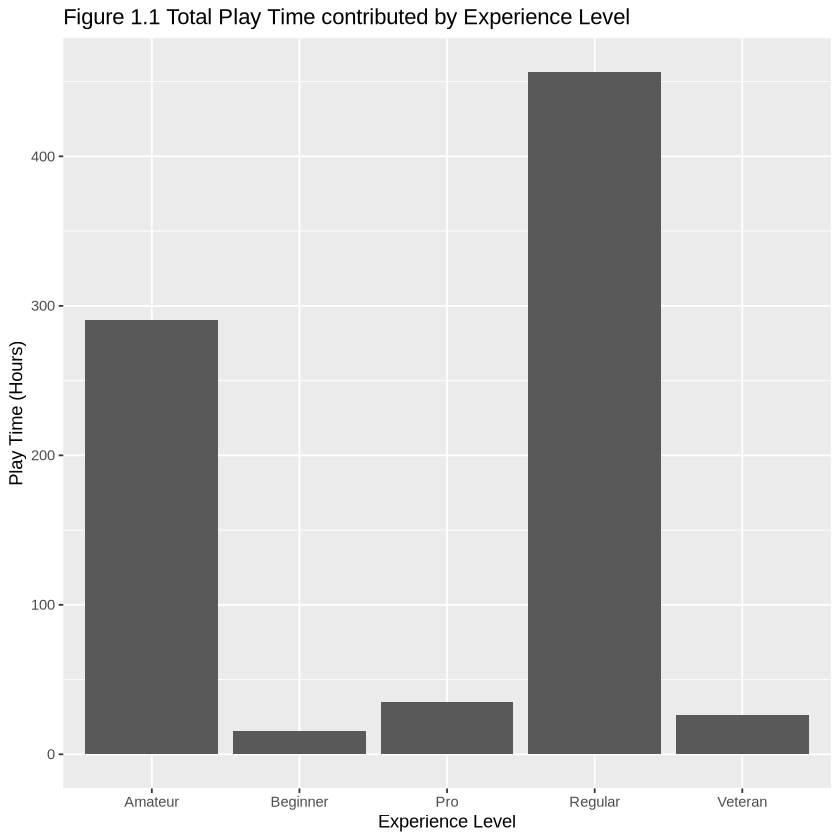

In [53]:
plot1

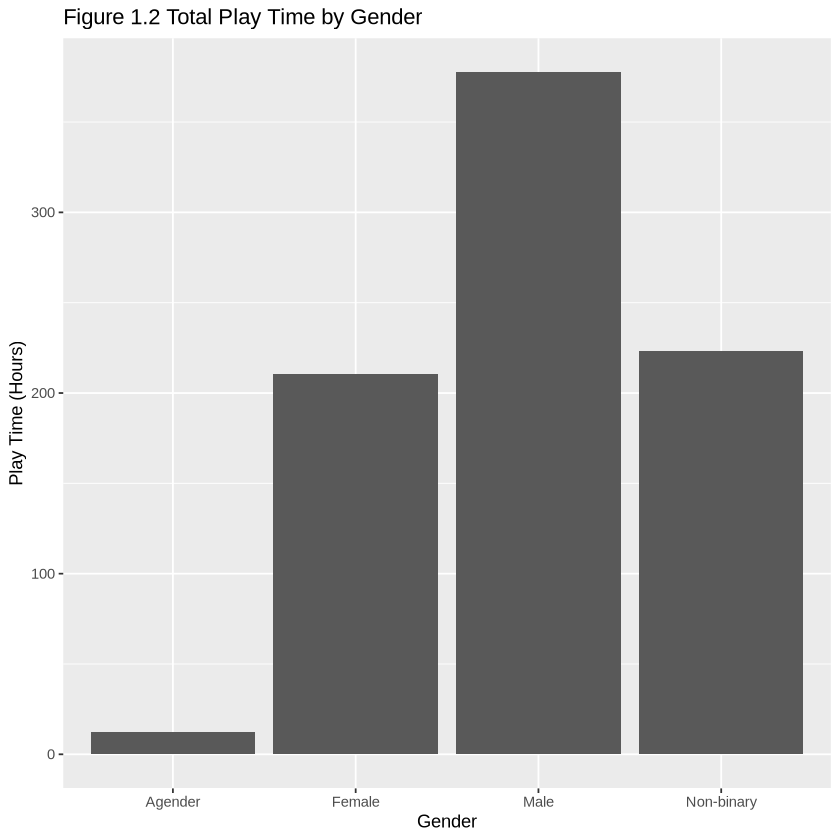

In [54]:
plot2

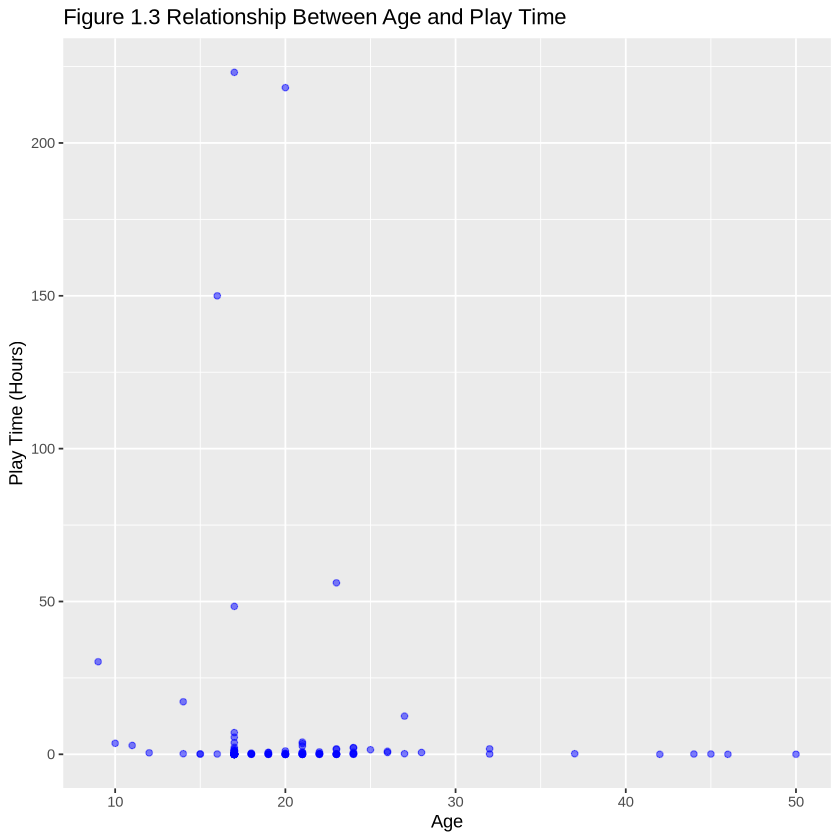

In [55]:
plot3

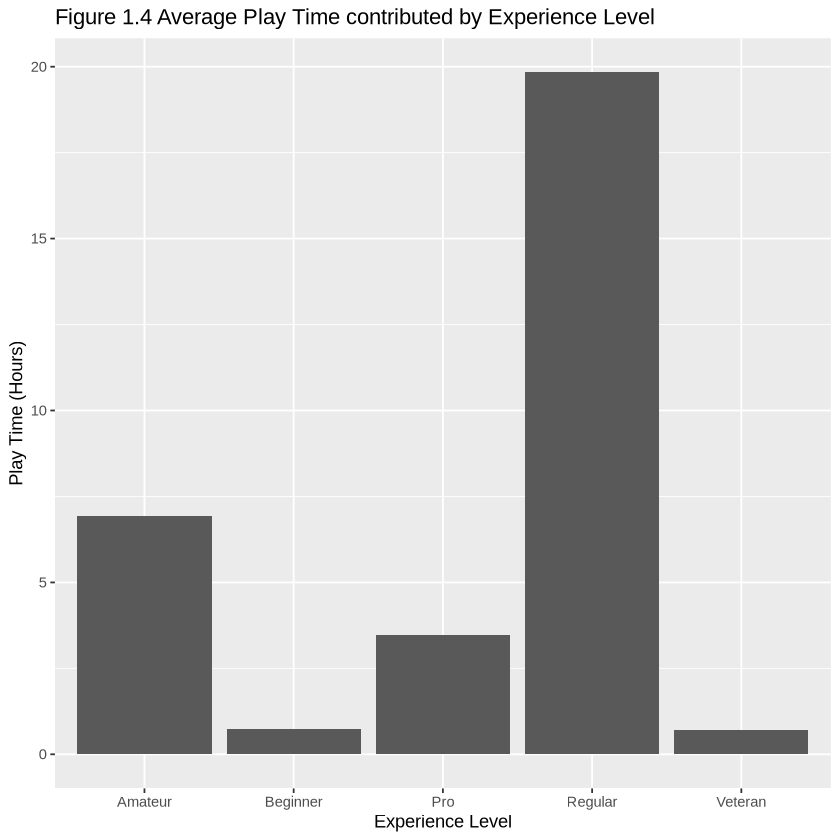

In [56]:
plot4

Warning message:
“Removed 14 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


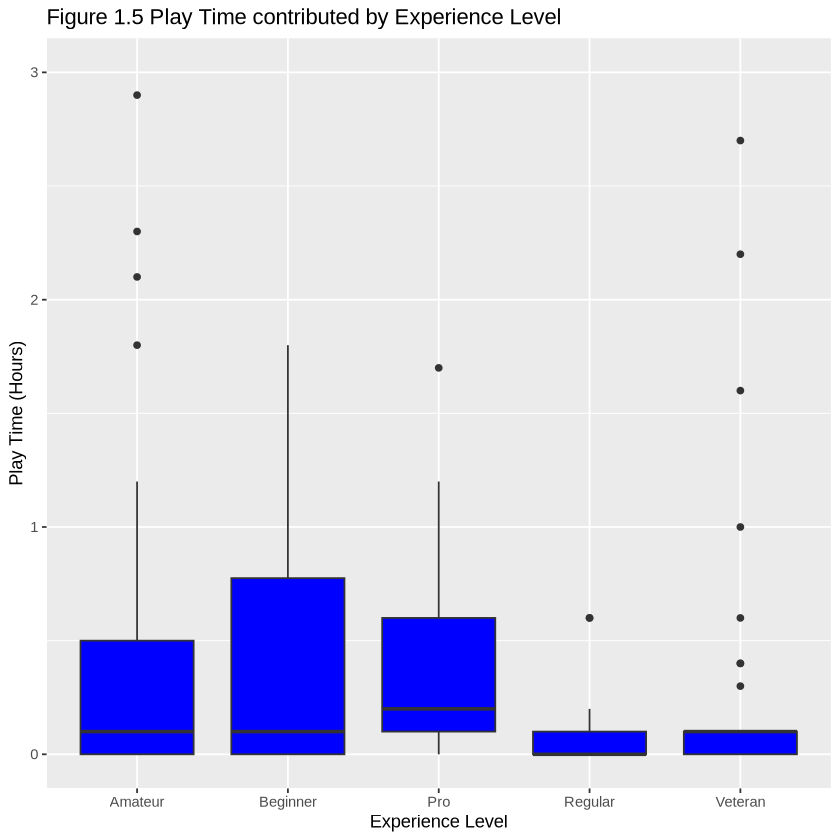

In [57]:
plot5

## Creating the model
Our group decided on k-nn regression.

In [58]:
minecraft_train_1

experience,subscribe,hashedEmail,played_hours,name,gender,age,experience_num,gender_num
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5,0
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,3,0
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,2,1
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,3,1
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,2,0
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,2,0
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22,5,1
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,4,0
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17,5,2


In [29]:
#selecting columns

#creating the model

#using cross-validation to choose K

#create recipe and scale
minecraft_recipe<-recipe(played_hours ~ experience_num+gender_num, minecraft_train)|>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())
#creating model specification
minecraft_spec<-nearest_neighbor(weight_func = "rectangular",
                                 neighbors=tune())|>
                set_engine("kknn")|>
                set_mode("regression")

#create a 5-fold cross-validation object
minecraft_vfold<-vfold_cv(minecraft_train_1, v = 5, strata = played_hours)

#creating a workflow
minecraft_workflow<-workflow()|>
                    add_recipe(minecraft_recipe)|>
                    add_model(minecraft_spec)

minecraft_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


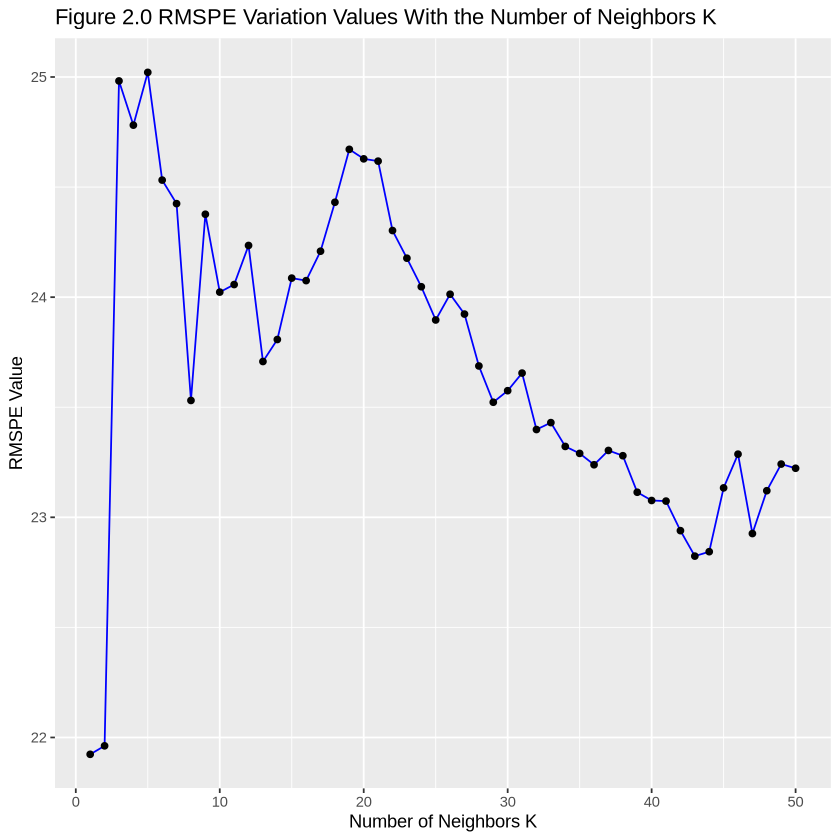

In [30]:
#run cross-validation for k between 1 and 50

gridvals<-tibble(neighbors=seq(from=1, to =50, by=1))
#results
minecraft_results<-minecraft_workflow|>
                   tune_grid(resamples = minecraft_vfold, grid = gridvals) |>
                   collect_metrics() |>
                   filter(.metric == "rmse")
minecraft_results
#visualizing results
results_plot<-ggplot(minecraft_results, aes(x=neighbors, y=mean))+
                geom_line(color="blue")+
                geom_point()+
                labs(title="Figure 2.0 RMSPE Variation Values With the Number of Neighbors K",
                    x="Number of Neighbors K",
                     y="RMSPE Value")
results_plot
                




In [26]:
#find minimum RMSPE
minecraft_min <- minecraft_results |>
  filter(mean == min(mean))

minecraft_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,19.67073,5,10.48237,Preprocessor1_Model01


#### From cross validation, we have determined that the best value of K is 8.

In [34]:
#creating model specification with k=8
kmin<-minecraft_min|>pull(neighbors)

minecraft_spec<-nearest_neighbor(weight_func = "rectangular",
                                 neighbors=kmin)|>
                set_engine("kknn")|>
                set_mode("regression")

#retrain our model on the training set
#creating a workflow
minecraft_fit<-workflow()|>
                    add_recipe(minecraft_recipe)|>
                    add_model(minecraft_spec)|>
                    fit(data = minecraft_train_1)
#predict on test
minecraft_summary<-minecraft_fit|>
    predict(minecraft_test)|>
    bind_cols(minecraft_test)|>
    metrics(truth=played_hours, estimate = .pred)|>
    filter(.metric =="rmse")

minecraft_summary

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17
Beginner,TRUE,f9ac013b2f0bc2bd4928a6a0fc8a0aae8b5c4f2670cf9e18f547b7e72034c965,1.0,Leah,Male,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,TRUE,d782933acd14c834e53dea816005a3583cb87710f7347a7a862cb4a43cc21692,0.0,Ishaan,Male,17
Amateur,TRUE,6ef84a204d64edc3b3779127b13f298d0c70f96568486f785271f4c81ec0fe72,0.0,Vivian,Male,17


ERROR: [1m[33mError[39m in `validate_column_names()`:[22m
[33m![39m The following required columns are missing: 'experience_num', 'gender_num'.


### Final model's test error is around 24.1 hours which is close to the RMSPE value of our tuned model (25.86 hours). This means our model appears to work well on new data that it has never seen before. However, a RMSPE value of 24.1 hours is alot in this scenario. 